# Lab 4: Preparing Data for a Random Forest Model

# Dataset Import  - "Vehicles_2013" 

In [ ]:
# Importing required packages

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# to ignore printing that warnings in some output

import warnings
warnings.filterwarnings('ignore')

**library that provides feature importances, based upon the permutation importance strategy, for general scikit-learn models and implementations specifically for random forest out-of-bag scores.**

In [ ]:
from rfpimp import *

**Dataset for Group 25 is Vehicles_2013**

**Importing dataset using pandas library and read_csv method**

In [ ]:
Vehicles_df = pd.read_csv("D:/Study/DAB/SEM 3/ML/lab4/vehicles_2013.csv") 

**Just renaming the dataframe**

In [ ]:
dff = Vehicles_df

# Preparing Data for a Model

**Let's check how many rows and columns we have..!**

In [ ]:
dff.shape

(1162, 163)

**Printing out first five records of the dataframe by using .head() method**

In [ ]:
dff.head()

,Unnamed: 0,Model Year,Mfr Name,Division,Carline,Verify Mfr Cd,Index (Model Type Index),Eng Displ,# Cyl,Trans as listed in FE Guide (derived from col AA thru AF),...,City CO2 Rounded Adjusted,Hwy CO2 Rounded Adjusted,Comb CO2 Rounded Adjusted (as shown on FE Label),CO2-PHEV Composite Rounded Adjusted Combined CO2,240V Charge Time at 240 volts (hours),120V Charge time at 120 Volts (hours),PHEV Total Driving Range (rounded to nearest 10 miles)DISTANCE,City PHEV Composite MPGe,Hwy PHEV Composite MPGe,Comb PHEV Composite MPGe
0,0,2013,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,ASX,2,4.7,8,Auto(AM7),...,654,426,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,ASX,1,4.7,8,Manual(M6),...,680,461,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2013,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,ASX,4,4.7,8,Auto(AM7),...,654,426,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2013,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,ASX,3,4.7,8,Manual(M6),...,680,461,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2013,Audi,Audi,TT Roadster quattro,ADX,67,2.0,4,Auto(AM-S6),...,394,284,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Printing out the same as above but with T - transpose, in different view**

In [ ]:
dff.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Model Year,2013,2013,2013,2013,2013
Mfr Name,aston martin,aston martin,aston martin,aston martin,Audi
Division,Aston Martin Lagonda Ltd,Aston Martin Lagonda Ltd,Aston Martin Lagonda Ltd,Aston Martin Lagonda Ltd,Audi
Carline,V8 Vantage,V8 Vantage,V8 Vantage S,V8 Vantage S,TT Roadster quattro
Verify Mfr Cd,ASX,ASX,ASX,ASX,ADX
Index (Model Type Index),2,1,4,3,67
Eng Displ,4.7,4.7,4.7,4.7,2
# Cyl,8,8,8,8,4
Trans as listed in FE Guide (derived from col AA thru AF),Auto(AM7),Manual(M6),Auto(AM7),Manual(M6),Auto(AM-S6)


**describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.**

In [ ]:
dff.describe()

,Unnamed: 0,Model Year,Index (Model Type Index),Eng Displ,# Cyl,City FE (Guide) - Conventional Fuel,Hwy FE (Guide) - Conventional Fuel,Comb FE (Guide) - Conventional Fuel,City Unrd Adj FE - Conventional Fuel,Hwy Unrd Adj FE - Conventional Fuel,...,City CO2 Rounded Adjusted,Hwy CO2 Rounded Adjusted,Comb CO2 Rounded Adjusted (as shown on FE Label),CO2-PHEV Composite Rounded Adjusted Combined CO2,240V Charge Time at 240 volts (hours),120V Charge time at 120 Volts (hours),PHEV Total Driving Range (rounded to nearest 10 miles)DISTANCE,City PHEV Composite MPGe,Hwy PHEV Composite MPGe,Comb PHEV Composite MPGe
count,1162.000000,1162.0,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,...,1162.000000,1162.000000,1162.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,580.500000,2013.0,196.135972,3.374096,5.837349,19.574871,26.977625,22.246988,19.536401,26.912754,...,488.778830,348.831325,425.679862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,335.584813,0.0,210.376658,1.422415,1.871003,5.539303,6.102161,5.683446,5.552328,6.129767,...,129.246262,83.990222,107.355066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2013.0,1.000000,1.000000,3.000000,8.000000,13.000000,10.000000,8.423200,13.329400,...,168.000000,177.000000,179.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,290.250000,2013.0,38.000000,2.000000,4.000000,16.000000,23.000000,18.000000,15.887425,22.836700,...,397.000000,288.000000,345.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,580.500000,2013.0,103.500000,3.400000,6.000000,19.000000,27.000000,21.000000,18.784350,26.682500,...,473.000000,333.500000,413.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,870.750000,2013.0,299.250000,4.400000,8.000000,22.000000,31.000000,26.000000,22.381400,30.853625,...,559.000000,389.000000,480.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1161.000000,2013.0,911.000000,8.400000,16.000000,53.000000,48.000000,50.000000,52.534100,48.231000,...,1050.000000,667.000000,847.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Printing out each and every column and it's unique valuers in it using dataframe.unique() method**

In [ ]:
for col in list(dff):
    print(col)
    uniq_values = dff[col].unique()
    print(uniq_values)

Unnamed: 0
[   0    1    2 ... 1159 1160 1161]
Model Year
[2013]
Mfr Name
['aston martin' 'Audi' 'BMW' 'Bugatti' 'General Motors' 'Ferrari' 'Honda'
 'Lamborghini' 'MAZDA' 'Mercedes-Benz' 'Nissan' 'Porsche'
 'Chrysler Group LLC' 'Jaguar Cars' 'Lotus' 'Toyota' 'Subaru' 'Bentley'
 'Ford Motor Company' 'Hyundai' 'Maserati' 'Roush' 'Suzuki' 'Volkswagen'
 'Volvo' 'Kia' 'Mitsubishi Motors Co' 'Rolls-Royce' 'Jaguar Land Rover L'
 'VPG' 'Land Rover']
Division
['Aston Martin Lagonda Ltd' 'Audi' 'BMW' 'Bugatti' 'Chevrolet'
 'Ferrari North America, Inc.' 'Honda' 'Lamborghini' 'MAZDA'
 'Mercedes-Benz' 'Mini' 'NISSAN' 'Porsche' 'SRT' 'FIAT' 'Jaguar Cars Ltd'
 'Lotus Cars Ltd' 'SCION' 'Subaru' 'Bentley Motors Ltd.' 'Ford'
 'HYUNDAI MOTOR COMPANY' 'INFINITI' 'LEXUS' 'MASERATI'
 'Roush Industries, Inc.' 'Suzuki' 'Volkswagen'
 'Volvo Cars of North America, LLC' 'Acura' 'Buick' 'Cadillac' 'Chrysler'
 'KIA MOTORS CORPORATION' 'Mitsubishi Motors Corporation'
 'Rolls-Royce Motor Cars Limited' 'TOYOTA' 'Dodg

[nan]
SmartWay1 (EPA-derived SmartWay rating for Test Group 1)
[nan]
#2 Smog Rating Test Group
[nan 'DBMXV03.0E89' 'DVWXJ02.03UA' 'DVWXV02.5U3A' 'DHNXV01.5YD2'
 'DBMXV02.0N26' 'DGMXJ02.5150' 'DGMXV01.8031' 'DHNXV01.8CB1'
 'DHNXV01.5YDB' 'DHNXV01.51D2' 'DKMXV02.04DE' 'DKMXV02.45EP'
 'DTKXV02.05NN' 'DFJXJ02.5NKR' 'DVWXV02.5U3M' 'DADXV02.03UA'
 'DCRXV02.4FR0' 'DFMXV01.6VZF' 'DHNXV02.4NC3' 'DHNXV03.5GB4'
 'DKMXV02.0DCE' 'DKMXV02.45GP' 'DNSXV02.585A' 'DFJXJ03.6TGK'
 'DTYXV02.5HE2' 'DVVXJ03.2S2N' 'DHYXV02.42GP' 'DNSXV01.881A'
 'DTYXT02.7BEH' 'DGMXT05.3373' 'DGMXT06.2375' 'DGMXT06.0372'
 'DCRXT04.7UPA' 'DHYXT02.41SE' 'DKMXT02.44KE' 'DMTXT02.4GRC'
 'DNSXJ02.5G5B' 'DFMXT05.44HY']
#2 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 2)
[nan  5.  8.  6.  9.  7.  2.]
#2 EPA Smog Rating (EPA Smog 1-10 Rating on Label for Test Group 2)
[nan]
SmartWay2 (EPA-derived SmartWay rating for Test Group 2)
[nan]
#3 Smog Rating Test Group
[nan]
#3 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for

**Created Function for printing out column names with datatype, percent missing and Number of unique values that particular column contains**

**Reference - Used from online class**

In [ ]:
def sniff(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
#         info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

**Calling that function named sniff for the output**

In [ ]:
sniff(dff)

,data type,percent missing,No. unique
Unnamed: 0,int64,0.000000,1162
Annual Fuel1 Cost - Conventional Fuel,int64,0.000000,48
City CO2 Rounded Adjusted,int64,0.000000,390
Hwy CO2 Rounded Adjusted,int64,0.000000,289
Comb FE (Guide) - Conventional Fuel,int64,0.000000,35
# Gears,int64,0.000000,6
City FE (Guide) - Conventional Fuel,int64,0.000000,36
Comb CO2 Rounded Adjusted (as shown on FE Label),int64,0.000000,356
Hwy FE (Guide) - Conventional Fuel,int64,0.000000,33
Index (Model Type Index),int64,0.000000,478


In [ ]:
# a=sniff(dff)
# pd.set_option('display.max_rows', None)
# print(a)

**Checking number of null values in each feature**

In [ ]:
dff.isnull().sum()

Unnamed: 0                                                                                                      0
Model Year                                                                                                      0
Mfr Name                                                                                                        0
Division                                                                                                        0
Carline                                                                                                         0
Verify Mfr Cd                                                                                                   0
Index (Model Type Index)                                                                                        0
Eng Displ                                                                                                       0
# Cyl                                                                                   

# Base line model

**To print a concise summary of a DataFrame and prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.**

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Columns: 163 entries, Unnamed: 0 to Comb PHEV Composite MPGe
dtypes: float64(72), int64(16), object(75)
memory usage: 1.4+ MB


**Separating numeric and categorical features for normal checkup in the baseline model**

**Defining numeric features using select_dtypes method**

In [ ]:
num_df = dff.select_dtypes(exclude=['object'])
num_df.shape

(1162, 88)

**Defining Categorical Features using select_dtypes method**

In [ ]:
cate_df = dff.select_dtypes(exclude=[np.number])
cate_df.shape

(1162, 75)

**Droping some of the columns which are having null values over 90% and have nothing in the columns**

**Using some mathemetical equation and .drop() method**

In [ ]:
cols_to_delete = num_df.columns[num_df.isnull().sum()/len(num_df) > .90]
num_df.drop(cols_to_delete, axis = 1, inplace = True)

**Printing rows and columns of numerical features**

In [ ]:
num_df.shape

(1162, 43)

**Defining X and Y values for model fit**

**'City Unrd Adj FE - Conventional Fuel' is the target as per the instruction**

**Using simpleImputer class which provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.**

In [ ]:
x = num_df.drop(['City Unrd Adj FE - Conventional Fuel'], axis=1)
y = num_df['City Unrd Adj FE - Conventional Fuel']
#x.replace([np.inf, -np.inf], np.nan, inplace=True)
#print(x.isnull().any())
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(x)
x = imputer.transform(x)
x=pd.DataFrame(x)
x.columns=['Unnamed: 0', 'Model Year', 'Index (Model Type Index)', 'Eng Displ',
       '# Cyl', 'City FE (Guide) - Conventional Fuel',
       'Hwy FE (Guide) - Conventional Fuel',
       'Comb FE (Guide) - Conventional Fuel',
       'Hwy Unrd Adj FE - Conventional Fuel',
       'Comb Unrd Adj FE - Conventional Fuel', '# Gears',
       'Max Ethanol % - Gasoline', '2Dr Pass Vol', '2Dr Lugg Vol',
       '4Dr Pass Vol', '4Dr Lugg Vol', 'Annual Fuel1 Cost - Conventional Fuel',
       'City2 FE (Guide) - Alternative Fuel',
       'Hwy2 Fuel FE (Guide) - Alternative Fuel',
       'Comb2 Fuel FE (Guide) - Alternative Fuel',
       'City2 Unadj FE - Alternative Fuel', 'Hwy2 Unadj FE - Alternative Fuel',
       'Comb2 Unadj FE - Alternative Fuel',
       'City2 Unrd Adj FE - Alternative Fuel',
       'Hwy2 Unrd Adj FE - Alternative Fuel',
       'Cmb2 Unrd Adj FE - Alternative Fuel',
       'Fuel2 Annual Fuel Cost - Alternative Fuel',
       'City CO2 Rounded Adjusted - Fuel2', 'Hwy CO2 Rounded Adjusted - Fuel2',
       'Comb CO2 Rounded Adjusted - Fuel2',
       'Fuel2 EPA Calculated Annual Fuel Cost - Alternative Fuel',
       'Intake Valves Per Cyl', 'Exhaust Valves Per Cyl', 'Carline Class',
       'EPA FE Label Dataset ID',
       'GHG 1-10 rating on Ethanol (EPA Determined)',
       '#2 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 2)',
       '$ You Save over 5 years (amount saved in fuel costs over 5 years - on label) ',
       '$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label) ',
       'City CO2 Rounded Adjusted', 'Hwy CO2 Rounded Adjusted',
       'Comb CO2 Rounded Adjusted (as shown on FE Label)']
x=pd.DataFrame(x)
x.head()

,Unnamed: 0,Model Year,Index (Model Type Index),Eng Displ,# Cyl,City FE (Guide) - Conventional Fuel,Hwy FE (Guide) - Conventional Fuel,Comb FE (Guide) - Conventional Fuel,Hwy Unrd Adj FE - Conventional Fuel,Comb Unrd Adj FE - Conventional Fuel,...,Exhaust Valves Per Cyl,Carline Class,EPA FE Label Dataset ID,GHG 1-10 rating on Ethanol (EPA Determined),#2 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 2),$ You Save over 5 years (amount saved in fuel costs over 5 years - on label),$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label),City CO2 Rounded Adjusted,Hwy CO2 Rounded Adjusted,Comb CO2 Rounded Adjusted (as shown on FE Label)
0,0.0,2013.0,2.0,4.7,8.0,14.0,21.0,16.0,20.7709,16.0340,...,2.0,1.0,12953.0,3.867089,5.621795,1717.241379,6150.000000,654.0,426.0,551.0
1,1.0,2013.0,1.0,4.7,8.0,13.0,19.0,15.0,19.1766,15.1973,...,2.0,1.0,12952.0,3.867089,5.621795,1717.241379,7400.000000,680.0,461.0,581.0
2,2.0,2013.0,4.0,4.7,8.0,14.0,21.0,16.0,20.7709,16.0340,...,2.0,1.0,12955.0,3.867089,5.621795,1717.241379,6150.000000,654.0,426.0,551.0
3,3.0,2013.0,3.0,4.7,8.0,13.0,19.0,15.0,19.1766,15.1973,...,2.0,1.0,12954.0,3.867089,5.621795,1717.241379,7400.000000,680.0,461.0,581.0
4,4.0,2013.0,67.0,2.0,4.0,22.0,31.0,26.0,31.1674,25.6515,...,2.0,1.0,12113.0,3.867089,5.621795,600.000000,3524.484182,394.0,284.0,345.0


**Using RandomForestRegressor model to fit the data and creating baselinemodel**

**Printing oob - Out Of Bag  score**

In [ ]:
base_rf = RandomForestRegressor(n_estimators=100,
                                 min_samples_leaf=5,
                                 n_jobs=-1,
                                 oob_score=True)

rf = clone(base_rf)
rf.fit(x, y)
print(rf.oob_score_)
# SKLEARN default importances
# default_imp=pd.DataFrame(data={'importance':rf.feature_importances_,'features':x.columns})
# default_imp=default_imp.set_index('features')
# default_imp=default_imp.sort_values('importance',ascending=False)
# default_imp.plot(kind='bar',figsize=(15,5))
# plt.show()

0.9935475459843812


**Creating function for printing that base line model to see which are features important for model fitting using prop_importances**

In [ ]:
def showimp(rf, x, y):
    features = list(x.columns)
    I = importances(rf, x, y, features=features)
    plot_importances(I, color='#4575b4')

**Calling that function to visualize that importances**

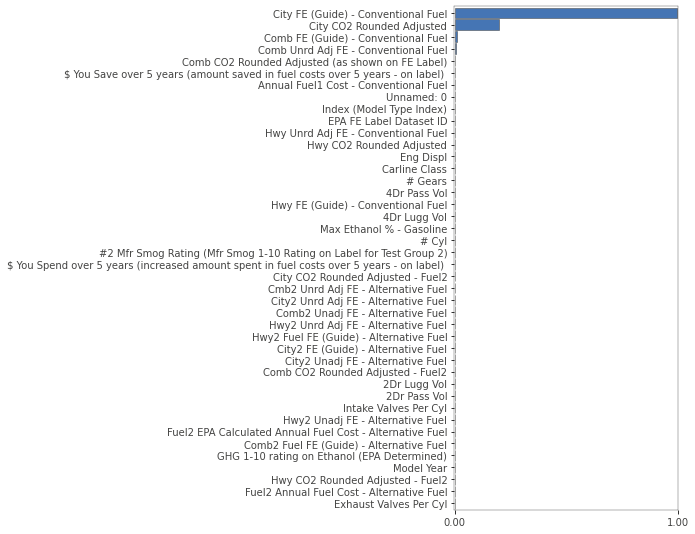

In [ ]:
showimp(rf, x, y)

# Missing data Handeling

# Cleaning the data

**Calling sniff function to print datatype, percent missing and numbero of unique values**

In [ ]:
sniff(dff)

,data type,percent missing,No. unique
Unnamed: 0,int64,0.000000,1162
Annual Fuel1 Cost - Conventional Fuel,int64,0.000000,48
City CO2 Rounded Adjusted,int64,0.000000,390
Hwy CO2 Rounded Adjusted,int64,0.000000,289
Comb FE (Guide) - Conventional Fuel,int64,0.000000,35
# Gears,int64,0.000000,6
City FE (Guide) - Conventional Fuel,int64,0.000000,36
Comb CO2 Rounded Adjusted (as shown on FE Label),int64,0.000000,356
Hwy FE (Guide) - Conventional Fuel,int64,0.000000,33
Index (Model Type Index),int64,0.000000,478


**Printing out list of features names**

In [ ]:
dff.columns.tolist()

['Unnamed: 0',
 'Model Year',
 'Mfr Name',
 'Division',
 'Carline',
 'Verify Mfr Cd',
 'Index (Model Type Index)',
 'Eng Displ',
 '# Cyl',
 'Trans as listed in FE Guide (derived from col AA thru AF)',
 'City FE (Guide) - Conventional Fuel',
 'Hwy FE (Guide) - Conventional Fuel',
 'Comb FE (Guide) - Conventional Fuel',
 'City Unadj FE - Conventional Fuel',
 'Hwy Unadj FE - Conventional Fuel',
 'Comb Unadj FE - Conventional Fuel',
 'City Unrd Adj FE - Conventional Fuel',
 'Hwy Unrd Adj FE - Conventional Fuel',
 'Comb Unrd Adj FE - Conventional Fuel',
 'Guzzler? ',
 'Air Aspir Method',
 'Air Aspiration Method Desc',
 'Trans',
 'Trans Desc',
 'Trans, Other',
 '# Gears',
 'Lockup Torque Converter',
 'Trans Creeper Gear',
 'Drive Sys',
 'Drive Desc',
 'Max Ethanol % - Gasoline',
 'Max Biodiesel %',
 'Range1 - Model Type Driving Range - Conventional Fuel',
 'Fuel Usage  - Conventional Fuel',
 'Fuel Usage Desc - Conventional Fuel',
 'Fuel Unit - Conventional Fuel',
 'Fuel Unit Desc - Conventio

**Removing Features**

**The very first column that is** "unnamed" **in the dataframe and is having nothing but just index number and so our model will not be able to use this to help it generalize.**

In [ ]:
dff.drop(dff.columns[0], axis=1, inplace=True)

**Printing out list of features names**

In [ ]:
dff.columns.tolist()

['Model Year',
 'Mfr Name',
 'Division',
 'Carline',
 'Verify Mfr Cd',
 'Index (Model Type Index)',
 'Eng Displ',
 '# Cyl',
 'Trans as listed in FE Guide (derived from col AA thru AF)',
 'City FE (Guide) - Conventional Fuel',
 'Hwy FE (Guide) - Conventional Fuel',
 'Comb FE (Guide) - Conventional Fuel',
 'City Unadj FE - Conventional Fuel',
 'Hwy Unadj FE - Conventional Fuel',
 'Comb Unadj FE - Conventional Fuel',
 'City Unrd Adj FE - Conventional Fuel',
 'Hwy Unrd Adj FE - Conventional Fuel',
 'Comb Unrd Adj FE - Conventional Fuel',
 'Guzzler? ',
 'Air Aspir Method',
 'Air Aspiration Method Desc',
 'Trans',
 'Trans Desc',
 'Trans, Other',
 '# Gears',
 'Lockup Torque Converter',
 'Trans Creeper Gear',
 'Drive Sys',
 'Drive Desc',
 'Max Ethanol % - Gasoline',
 'Max Biodiesel %',
 'Range1 - Model Type Driving Range - Conventional Fuel',
 'Fuel Usage  - Conventional Fuel',
 'Fuel Usage Desc - Conventional Fuel',
 'Fuel Unit - Conventional Fuel',
 'Fuel Unit Desc - Conventional Fuel',
 'Ga

**Extracting out columns that have more than 1000 unique values which of course are not usefull for the model fit**

In [ ]:
noneedcols = []
for i in list(dff):
    n = len(pd.unique(dff[i])) 
    if n > 1000:
        noneedcols.append(i)
print(noneedcols)

['EPA FE Label Dataset ID']


**This is the column that has more values and now checking shape again**

In [ ]:
dff['EPA FE Label Dataset ID'].shape

(1162,)

**This column named** "EPA FE Label Dataset ID" **contains unique ids for whole dataframe which are dataset ID's, So will not be used in model to generalize it.**

In [ ]:
dff.drop(['EPA FE Label Dataset ID'], axis=1, inplace=True)
dff.columns.tolist()

['Model Year',
 'Mfr Name',
 'Division',
 'Carline',
 'Verify Mfr Cd',
 'Index (Model Type Index)',
 'Eng Displ',
 '# Cyl',
 'Trans as listed in FE Guide (derived from col AA thru AF)',
 'City FE (Guide) - Conventional Fuel',
 'Hwy FE (Guide) - Conventional Fuel',
 'Comb FE (Guide) - Conventional Fuel',
 'City Unadj FE - Conventional Fuel',
 'Hwy Unadj FE - Conventional Fuel',
 'Comb Unadj FE - Conventional Fuel',
 'City Unrd Adj FE - Conventional Fuel',
 'Hwy Unrd Adj FE - Conventional Fuel',
 'Comb Unrd Adj FE - Conventional Fuel',
 'Guzzler? ',
 'Air Aspir Method',
 'Air Aspiration Method Desc',
 'Trans',
 'Trans Desc',
 'Trans, Other',
 '# Gears',
 'Lockup Torque Converter',
 'Trans Creeper Gear',
 'Drive Sys',
 'Drive Desc',
 'Max Ethanol % - Gasoline',
 'Max Biodiesel %',
 'Range1 - Model Type Driving Range - Conventional Fuel',
 'Fuel Usage  - Conventional Fuel',
 'Fuel Usage Desc - Conventional Fuel',
 'Fuel Unit - Conventional Fuel',
 'Fuel Unit Desc - Conventional Fuel',
 'Ga

In [ ]:
dff.shape

(1162, 161)

**There are some columns which contain no values in it and more than 90% values are NaN values so, they need to get deleted**

In [ ]:
Nan_cols = dff.columns[dff.isnull().sum()/len(dff) > .90]
Nan_cols

Index(['Guzzler? ', 'Trans, Other', 'Max Biodiesel %', 'Htchbk Pass Vol',
       'Htchbk Lugg Vol', 'Unnamed: 74', 'Relabel', 'Relabel Desc',
       'Cyl Deact Desc', 'Energy Storage Device Desc',
       'Energy Storage Device,If Other', '# Batteries', 'Battery Type Desc',
       'Battery Type, If Other', 'Total Voltage for Battery Pack(s)',
       'Batt Energy Capacity (Amp-hrs)', 'Batt Specific Energy (Watt-hr/kg)',
       'Batt Charger Type Desc', 'Comments', '# Capacitors',
       'Regen Braking Type Desc', 'Regen Braking Type, If Other',
       'Regen Braking Wheels Source (Front, Rear, Both)',
       'Driver Cntrl Regen Braking?', 'Fuel Cell Desc',
       'Usable H2 Fill Capacity (kg)', 'Fuel Cell Onboard H2 Capacity (kg)',
       'HEV-EV Comments', '# Drive Motor Gen', 'Motor Gen Type Desc',
       'Motor Gen Type, If Other', 'Rated Motor Gen Power (kW)',
       'Fuel Metering Type 1 Desc', 'Fuel Metering Type 2 Desc',
       'Charge Depleting Calc Appr Code (PHEV only)',
      

**Droping out columns that have null value ratio of more than 90% or whole columns** 

In [ ]:
dff.drop(Nan_cols, axis = 1, inplace = True)
dff.columns.tolist()

['Model Year',
 'Mfr Name',
 'Division',
 'Carline',
 'Verify Mfr Cd',
 'Index (Model Type Index)',
 'Eng Displ',
 '# Cyl',
 'Trans as listed in FE Guide (derived from col AA thru AF)',
 'City FE (Guide) - Conventional Fuel',
 'Hwy FE (Guide) - Conventional Fuel',
 'Comb FE (Guide) - Conventional Fuel',
 'City Unadj FE - Conventional Fuel',
 'Hwy Unadj FE - Conventional Fuel',
 'Comb Unadj FE - Conventional Fuel',
 'City Unrd Adj FE - Conventional Fuel',
 'Hwy Unrd Adj FE - Conventional Fuel',
 'Comb Unrd Adj FE - Conventional Fuel',
 'Air Aspir Method',
 'Air Aspiration Method Desc',
 'Trans',
 'Trans Desc',
 '# Gears',
 'Lockup Torque Converter',
 'Trans Creeper Gear',
 'Drive Sys',
 'Drive Desc',
 'Max Ethanol % - Gasoline',
 'Range1 - Model Type Driving Range - Conventional Fuel',
 'Fuel Usage  - Conventional Fuel',
 'Fuel Usage Desc - Conventional Fuel',
 'Fuel Unit - Conventional Fuel',
 'Fuel Unit Desc - Conventional Fuel',
 'Gas Guzzler Exempt (Where Truck = 1975 NHTSA truck de

In [ ]:
dff.shape

(1162, 100)

**Calling sniff function to print datatype, percent missing and numbero of unique values**

In [ ]:
sniff(dff)

,data type,percent missing,No. unique
Model Year,int64,0.000000,1
City CO2 Rounded Adjusted,int64,0.000000,390
Carline Class,int64,0.000000,22
Exhaust Valves Per Cyl,int64,0.000000,2
Intake Valves Per Cyl,int64,0.000000,2
Hwy CO2 Rounded Adjusted,int64,0.000000,289
Annual Fuel1 Cost - Conventional Fuel,int64,0.000000,48
# Gears,int64,0.000000,6
Comb FE (Guide) - Conventional Fuel,int64,0.000000,35
Hwy FE (Guide) - Conventional Fuel,int64,0.000000,33


**Looking at the columns that are related to fuel economy** 

In [ ]:
n = dff.columns.tolist()
sub = 'fuel'
sub1 = 'Fuel'
fuel_cols = []
for text in n:
    if sub and sub1 in text:
        fuel_cols.append(text)
        
fuel_cols

['City FE (Guide) - Conventional Fuel',
 'Hwy FE (Guide) - Conventional Fuel',
 'Comb FE (Guide) - Conventional Fuel',
 'City Unadj FE - Conventional Fuel',
 'Hwy Unadj FE - Conventional Fuel',
 'Comb Unadj FE - Conventional Fuel',
 'City Unrd Adj FE - Conventional Fuel',
 'Hwy Unrd Adj FE - Conventional Fuel',
 'Comb Unrd Adj FE - Conventional Fuel',
 'Range1 - Model Type Driving Range - Conventional Fuel',
 'Fuel Usage  - Conventional Fuel',
 'Fuel Usage Desc - Conventional Fuel',
 'Fuel Unit - Conventional Fuel',
 'Fuel Unit Desc - Conventional Fuel',
 'Annual Fuel1 Cost - Conventional Fuel',
 'EPA Calculated Annual Fuel Cost - Conventional Fuel -----  Annual fuel cost error. Please revise Verify. ',
 'City2 FE (Guide) - Alternative Fuel',
 'Hwy2 Fuel FE (Guide) - Alternative Fuel',
 'Comb2 Fuel FE (Guide) - Alternative Fuel',
 'City2 Unadj FE - Alternative Fuel',
 'Hwy2 Unadj FE - Alternative Fuel',
 'Comb2 Unadj FE - Alternative Fuel',
 'City2 Unrd Adj FE - Alternative Fuel',
 'Hw

**Creating function for printing missing value for each fuel columns**

In [ ]:
def fuel(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        i = pd.DataFrame()
        i['percent missing'] = df.isnull().sum()*100/len(df)
        return i.sort_values('percent missing')

**Calling that function for the output of fuel columns missing values**

In [ ]:
fuel_df = pd.DataFrame(dff[fuel_cols])
fuel(fuel_df)

,percent missing
City FE (Guide) - Conventional Fuel,0.000000
Annual Fuel1 Cost - Conventional Fuel,0.000000
Fuel Unit Desc - Conventional Fuel,0.000000
Fuel Unit - Conventional Fuel,0.000000
Fuel Usage Desc - Conventional Fuel,0.000000
Fuel Usage - Conventional Fuel,0.000000
Fuel Metering Sys Cd,0.000000
EPA Calculated Annual Fuel Cost - Conventional Fuel ----- Annual fuel cost error. Please revise Verify.,0.000000
Comb Unrd Adj FE - Conventional Fuel,0.000000
City Unrd Adj FE - Conventional Fuel,0.000000


**Just for conformation, checking duplicate values in the dataset**

In [ ]:
dff.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

**Looks like there is no dummy featuree to remove**

**Calling sniff function to print datatype, percent missing and numbero of unique values**

In [ ]:
sniff(dff)

,data type,percent missing,No. unique
Model Year,int64,0.000000,1
City CO2 Rounded Adjusted,int64,0.000000,390
Carline Class,int64,0.000000,22
Exhaust Valves Per Cyl,int64,0.000000,2
Intake Valves Per Cyl,int64,0.000000,2
Hwy CO2 Rounded Adjusted,int64,0.000000,289
Annual Fuel1 Cost - Conventional Fuel,int64,0.000000,48
# Gears,int64,0.000000,6
Comb FE (Guide) - Conventional Fuel,int64,0.000000,35
Hwy FE (Guide) - Conventional Fuel,int64,0.000000,33


**Printing out each and every column and it's unique valuers in it using dataframe.unique() method**

In [ ]:
for col in list(dff):
    print(col)
    uniq_values = dff[col].unique()
    print(uniq_values)

Model Year
[2013]
Mfr Name
['aston martin' 'Audi' 'BMW' 'Bugatti' 'General Motors' 'Ferrari' 'Honda'
 'Lamborghini' 'MAZDA' 'Mercedes-Benz' 'Nissan' 'Porsche'
 'Chrysler Group LLC' 'Jaguar Cars' 'Lotus' 'Toyota' 'Subaru' 'Bentley'
 'Ford Motor Company' 'Hyundai' 'Maserati' 'Roush' 'Suzuki' 'Volkswagen'
 'Volvo' 'Kia' 'Mitsubishi Motors Co' 'Rolls-Royce' 'Jaguar Land Rover L'
 'VPG' 'Land Rover']
Division
['Aston Martin Lagonda Ltd' 'Audi' 'BMW' 'Bugatti' 'Chevrolet'
 'Ferrari North America, Inc.' 'Honda' 'Lamborghini' 'MAZDA'
 'Mercedes-Benz' 'Mini' 'NISSAN' 'Porsche' 'SRT' 'FIAT' 'Jaguar Cars Ltd'
 'Lotus Cars Ltd' 'SCION' 'Subaru' 'Bentley Motors Ltd.' 'Ford'
 'HYUNDAI MOTOR COMPANY' 'INFINITI' 'LEXUS' 'MASERATI'
 'Roush Industries, Inc.' 'Suzuki' 'Volkswagen'
 'Volvo Cars of North America, LLC' 'Acura' 'Buick' 'Cadillac' 'Chrysler'
 'KIA MOTORS CORPORATION' 'Mitsubishi Motors Corporation'
 'Rolls-Royce Motor Cars Limited' 'TOYOTA' 'Dodge' 'Jaguar' 'Lincoln'
 'GMC' 'RAM' 'The Vehicle

**It will be much easier to handle if we convert all the different ways this data has to signal missing data down to a single representation: np.nan.** 

**To do this we will use the following function which:**

-converts all strings (text) to lower case;

-fills actual missing data with np.nan; the impact of this is to convert None to np.nan;

-convert all the other representations ('none', 'not applicable', Mod, '??', and '') to np.nan.

In [ ]:
from pandas.api.types import is_string_dtype, is_object_dtype

def df_normalize_strings(df):
    for col in df.columns:
        if is_string_dtype(df[col]) or is_object_dtype(df[col]):
            df[col] = df[col].str.lower()
            df[col] = df[col].fillna(np.nan)
            df[col] = df[col].replace('not applicable', np.nan)
            df[col] = df[col].replace('Mod', np.nan)
            df[col] = df[col].replace('none', np.nan)
            df[col] = df[col].replace('??', np.nan)
            df[col] = df[col].replace('', np.nan)

**Calling that function to convert all the unnecessary values into nan**

In [ ]:
df_normalize_strings(dff)

**Calling sniff function to print datatype, percent missing and numbero of unique values**

In [ ]:
sniff(dff)

,data type,percent missing,No. unique
Model Year,int64,0.000000,1
City CO2 Rounded Adjusted,int64,0.000000,390
Carline Class,int64,0.000000,22
Exhaust Valves Per Cyl,int64,0.000000,2
Intake Valves Per Cyl,int64,0.000000,2
Hwy CO2 Rounded Adjusted,int64,0.000000,289
Annual Fuel1 Cost - Conventional Fuel,int64,0.000000,48
# Gears,int64,0.000000,6
Comb FE (Guide) - Conventional Fuel,int64,0.000000,35
Hwy FE (Guide) - Conventional Fuel,int64,0.000000,33


**Printing out each and every column and it's unique valuers in it using dataframe.unique() method**

In [ ]:
for col in list(dff):
    print(col)
    uniq_values = dff[col].unique()
    print(uniq_values)

Model Year
[2013]
Mfr Name
['aston martin' 'audi' 'bmw' 'bugatti' 'general motors' 'ferrari' 'honda'
 'lamborghini' 'mazda' 'mercedes-benz' 'nissan' 'porsche'
 'chrysler group llc' 'jaguar cars' 'lotus' 'toyota' 'subaru' 'bentley'
 'ford motor company' 'hyundai' 'maserati' 'roush' 'suzuki' 'volkswagen'
 'volvo' 'kia' 'mitsubishi motors co' 'rolls-royce' 'jaguar land rover l'
 'vpg' 'land rover']
Division
['aston martin lagonda ltd' 'audi' 'bmw' 'bugatti' 'chevrolet'
 'ferrari north america, inc.' 'honda' 'lamborghini' 'mazda'
 'mercedes-benz' 'mini' 'nissan' 'porsche' 'srt' 'fiat' 'jaguar cars ltd'
 'lotus cars ltd' 'scion' 'subaru' 'bentley motors ltd.' 'ford'
 'hyundai motor company' 'infiniti' 'lexus' 'maserati'
 'roush industries, inc.' 'suzuki' 'volkswagen'
 'volvo cars of north america, llc' 'acura' 'buick' 'cadillac' 'chrysler'
 'kia motors corporation' 'mitsubishi motors corporation'
 'rolls-royce motor cars limited' 'toyota' 'dodge' 'jaguar' 'lincoln'
 'gmc' 'ram' 'the vehicle

**digit/digit value to be converted into the mean value for better data**

In [ ]:
dff['Range1 - Model Type Driving Range - Conventional Fuel'].unique()

array([nan, '406', '333', '357', '380', '400', '364', '360', '350', '370',
       '410', '193', '390', '450', '430', '324', '490', '460', '446',
       '407', '440', '401', '389', '410/560', '440/590', '480', '490/680',
       '440/610', '420', '520/640', '416/512', '390/520', '470/650',
       '420/580', '494/608', '396', '470', '500', '330', '447', '300',
       '510', '540', '469', '450/540', '420/500'], dtype=object)

**Converting all the odd looking data into nan** 

In [ ]:
dff['Range1 - Model Type Driving Range - Conventional Fuel'] = dff['Range1 - Model Type Driving Range - Conventional Fuel'].astype(str)
value_bemean = '/'

for text in dff['Range1 - Model Type Driving Range - Conventional Fuel'].values:
#     while(text != 'nan'):
    if value_bemean in text:
        dff['Range1 - Model Type Driving Range - Conventional Fuel'] = dff['Range1 - Model Type Driving Range - Conventional Fuel'].replace(text, 'nan')
#         break

**Printing out unique values of that column to see the update**

In [ ]:
dff['Range1 - Model Type Driving Range - Conventional Fuel'].unique()

array(['nan', '406', '333', '357', '380', '400', '364', '360', '350',
       '370', '410', '193', '390', '450', '430', '324', '490', '460',
       '446', '407', '440', '401', '389', '480', '420', '396', '470',
       '500', '330', '447', '300', '510', '540', '469'], dtype=object)

**coverting str to numeric which are already numeric but in str type**

In [ ]:
dff['Range1 - Model Type Driving Range - Conventional Fuel'] = dff['Range1 - Model Type Driving Range - Conventional Fuel'].astype('float')

**Now filling that nan values into mean of all the values the column contains**

In [ ]:
dff['Range1 - Model Type Driving Range - Conventional Fuel'].fillna(dff['Range1 - Model Type Driving Range - Conventional Fuel'].mean(), inplace=True)

**Printing out unique values of the same column to see the update**

In [ ]:
dff['Range1 - Model Type Driving Range - Conventional Fuel'].unique()

array([414.22962963, 406.        , 333.        , 357.        ,
       380.        , 400.        , 364.        , 360.        ,
       350.        , 370.        , 410.        , 193.        ,
       390.        , 450.        , 430.        , 324.        ,
       490.        , 460.        , 446.        , 407.        ,
       440.        , 401.        , 389.        , 480.        ,
       420.        , 396.        , 470.        , 500.        ,
       330.        , 447.        , 300.        , 510.        ,
       540.        , 469.        ])

**There are some features that are numeric by values but are stored in string - as object type**

**So, they need to be converted into numeric**

In [ ]:
dff['City Unadj FE - Conventional Fuel'] = pd.to_numeric(dff['City Unadj FE - Conventional Fuel'], errors='coerce')
dff['Hwy Unadj FE - Conventional Fuel'] = pd.to_numeric(dff['Hwy Unadj FE - Conventional Fuel'], errors='coerce')
dff['Comb Unadj FE - Conventional Fuel'] = pd.to_numeric(dff['Comb Unadj FE - Conventional Fuel'], errors='coerce')
dff['FE Rating (1-10 rating on Label)'] = pd.to_numeric(dff['FE Rating (1-10 rating on Label)'], errors='coerce')
dff['#1 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 1)'] = pd.to_numeric(dff['#1 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 1)'], errors='coerce')
dff['GHG Rating (1-10 rating on Label)'] = pd.to_numeric(dff['GHG Rating (1-10 rating on Label)'], errors='coerce')

**Calling sniff function to print datatype, percent missing and numbero of unique values**

In [ ]:
sniff(dff)

,data type,percent missing,No. unique
Model Year,int64,0.000000,1
City CO2 Rounded Adjusted,int64,0.000000,390
Carline Class,int64,0.000000,22
Exhaust Valves Per Cyl,int64,0.000000,2
Intake Valves Per Cyl,int64,0.000000,2
Hwy CO2 Rounded Adjusted,int64,0.000000,289
Annual Fuel1 Cost - Conventional Fuel,int64,0.000000,48
# Gears,int64,0.000000,6
Comb FE (Guide) - Conventional Fuel,int64,0.000000,35
Hwy FE (Guide) - Conventional Fuel,int64,0.000000,33


**Printing out each and every column and it's unique valuers in it using dataframe.unique() method**

In [ ]:
for col in list(dff):
    print(col)
    uniq_values = dff[col].unique()
    print(uniq_values)

Model Year
[2013]
Mfr Name
['aston martin' 'audi' 'bmw' 'bugatti' 'general motors' 'ferrari' 'honda'
 'lamborghini' 'mazda' 'mercedes-benz' 'nissan' 'porsche'
 'chrysler group llc' 'jaguar cars' 'lotus' 'toyota' 'subaru' 'bentley'
 'ford motor company' 'hyundai' 'maserati' 'roush' 'suzuki' 'volkswagen'
 'volvo' 'kia' 'mitsubishi motors co' 'rolls-royce' 'jaguar land rover l'
 'vpg' 'land rover']
Division
['aston martin lagonda ltd' 'audi' 'bmw' 'bugatti' 'chevrolet'
 'ferrari north america, inc.' 'honda' 'lamborghini' 'mazda'
 'mercedes-benz' 'mini' 'nissan' 'porsche' 'srt' 'fiat' 'jaguar cars ltd'
 'lotus cars ltd' 'scion' 'subaru' 'bentley motors ltd.' 'ford'
 'hyundai motor company' 'infiniti' 'lexus' 'maserati'
 'roush industries, inc.' 'suzuki' 'volkswagen'
 'volvo cars of north america, llc' 'acura' 'buick' 'cadillac' 'chrysler'
 'kia motors corporation' 'mitsubishi motors corporation'
 'rolls-royce motor cars limited' 'toyota' 'dodge' 'jaguar' 'lincoln'
 'gmc' 'ram' 'the vehicle

**There is one column named 'Car/Truck Category - Cash for Clunkers Bill.' that has three unique values in which is is nan and another is 1 which is very rare in dataset and unnecessarily typed so only one column is left and is not important based on the model**

In [ ]:
dff['Car/Truck Category - Cash for Clunkers Bill.']

0       car
1       car
2       car
3       car
4       car
5       car
6       car
7       car
8       car
9       car
10      car
11      car
12      car
13      car
14      car
15      car
16      car
17      car
18      car
19      car
20      car
21      car
22      car
23      car
24      car
25      car
26      car
27      car
28      car
29      car
30      car
31      car
32      car
33      car
34      car
35      car
36      car
37      car
38      car
39      car
40      car
41      car
42      car
43      car
44      car
45      car
46      car
47      car
48      car
49      car
50      car
51      car
52      car
53      car
54      car
55      car
56      car
57      car
58      car
59      car
60      car
61      car
62      car
63      car
64      car
65      car
66      car
67      car
68      car
69      car
70      car
71      car
72      car
73      car
74      car
75      car
76      car
77      car
78      car
79      car
80      car
81      car
82      car
83  

In [ ]:
dff['Car/Truck Category - Cash for Clunkers Bill.'].unique()

array(['car', nan, '1'], dtype=object)

**Dropping that column out from this dataset**

In [ ]:
dff.drop(['Car/Truck Category - Cash for Clunkers Bill.'], axis=1, inplace=True)

**Calling sniff function to print datatype, percent missing and numbero of unique values**

In [ ]:
sniff(dff)

,data type,percent missing,No. unique
Model Year,int64,0.000000,1
City CO2 Rounded Adjusted,int64,0.000000,390
Carline Class,int64,0.000000,22
Exhaust Valves Per Cyl,int64,0.000000,2
Intake Valves Per Cyl,int64,0.000000,2
Hwy CO2 Rounded Adjusted,int64,0.000000,289
Annual Fuel1 Cost - Conventional Fuel,int64,0.000000,48
# Gears,int64,0.000000,6
Comb FE (Guide) - Conventional Fuel,int64,0.000000,35
Hwy FE (Guide) - Conventional Fuel,int64,0.000000,33


**Now, it's time to deal the datetime feature of this dataset**

**Printing out unique values**

In [ ]:
dff['Release Date'].unique()

array(['2012-09-24 00:00:00', '2012-06-18 00:00:00',
       '2012-07-24 00:00:00', '2012-07-25 00:00:00',
       '2012-08-07 00:00:00', '2012-07-02 00:00:00',
       '2012-07-01 00:00:00', '2012-09-27 00:00:00',
       '2013-02-28 00:00:00', '2012-11-01 00:00:00',
       '2013-01-14 00:00:00', '2012-06-11 00:00:00',
       '2012-06-22 00:00:00', '2012-07-03 00:00:00',
       '2012-08-15 00:00:00', '2012-11-06 00:00:00',
       '2012-07-09 00:00:00', '2012-02-23 00:00:00',
       '2012-10-26 00:00:00', '2012-04-04 00:00:00',
       '2013-02-13 00:00:00', '2012-07-26 00:00:00',
       '2013-02-15 00:00:00', '2012-05-01 00:00:00',
       '2012-06-01 00:00:00', '2013-03-28 00:00:00',
       '2012-10-01 00:00:00', '2012-08-29 00:00:00',
       '2012-08-06 00:00:00', '2012-06-25 00:00:00',
       '2012-06-21 00:00:00', '2012-09-07 00:00:00',
       '2012-03-20 00:00:00', '2012-07-21 00:00:00',
       '2012-05-21 00:00:00', '2012-08-28 00:00:00',
       '2012-06-08 00:00:00', '2012-12-03 00:0

**Looks like, there are some of the rows which are not formated in datetime and stored randomly which are not required in this features**

**So, first of all converting all the datetime values in to_datetime format**

In [ ]:
dff['Release Date'] = pd.to_datetime(dff['Release Date'], errors='coerce')

**Now, dropping all of that values which are not in a datetime format and are no longer in use for this baselinemodel**

In [ ]:
dff = dff.dropna(subset=['Release Date'])
dff['Release Date'].unique()

array(['2012-09-24T00:00:00.000000000', '2012-06-18T00:00:00.000000000',
       '2012-07-24T00:00:00.000000000', '2012-07-25T00:00:00.000000000',
       '2012-08-07T00:00:00.000000000', '2012-07-02T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2012-09-27T00:00:00.000000000',
       '2013-02-28T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2013-01-14T00:00:00.000000000', '2012-06-11T00:00:00.000000000',
       '2012-06-22T00:00:00.000000000', '2012-07-03T00:00:00.000000000',
       '2012-08-15T00:00:00.000000000', '2012-11-06T00:00:00.000000000',
       '2012-07-09T00:00:00.000000000', '2012-02-23T00:00:00.000000000',
       '2012-10-26T00:00:00.000000000', '2012-04-04T00:00:00.000000000',
       '2013-02-13T00:00:00.000000000', '2012-07-26T00:00:00.000000000',
       '2013-02-15T00:00:00.000000000', '2012-05-01T00:00:00.000000000',
       '2012-06-01T00:00:00.000000000', '2013-03-28T00:00:00.000000000',
       '2012-10-01T00:00:00.000000000', '2012-08-29

**Based on the previous output, all the unnecessary values are gone but there are time attched with date and is not required**

**So, making new columns for year, month and day**

In [ ]:
dff['year']= dff['Release Date'].dt.year
dff['month']= dff['Release Date'].dt.month
dff['day']= dff['Release Date'].dt.day
dff

,Model Year,Mfr Name,Division,Carline,Verify Mfr Cd,Index (Model Type Index),Eng Displ,# Cyl,Trans as listed in FE Guide (derived from col AA thru AF),City FE (Guide) - Conventional Fuel,...,#2 Smog Rating Test Group,#2 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 2),$ You Save over 5 years (amount saved in fuel costs over 5 years - on label),$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label),City CO2 Rounded Adjusted,Hwy CO2 Rounded Adjusted,Comb CO2 Rounded Adjusted (as shown on FE Label),year,month,day
0,2013,aston martin,aston martin lagonda ltd,v8 vantage,asx,2,4.7,8,auto(am7),14,...,NaN,NaN,NaN,6150.0,654,426,551,2012,9,24
1,2013,aston martin,aston martin lagonda ltd,v8 vantage,asx,1,4.7,8,manual(m6),13,...,NaN,NaN,NaN,7400.0,680,461,581,2012,9,24
2,2013,aston martin,aston martin lagonda ltd,v8 vantage s,asx,4,4.7,8,auto(am7),14,...,NaN,NaN,NaN,6150.0,654,426,551,2012,9,24
3,2013,aston martin,aston martin lagonda ltd,v8 vantage s,asx,3,4.7,8,manual(m6),13,...,NaN,NaN,NaN,7400.0,680,461,581,2012,9,24
4,2013,audi,audi,tt roadster quattro,adx,67,2.0,4,auto(am-s6),22,...,NaN,NaN,600.0,NaN,394,284,345,2012,6,18
5,2013,bmw,bmw,z4 sdrive28i,bmx,428,2.0,4,auto(a8),22,...,NaN,NaN,600.0,NaN,403,266,341,2012,7,24
6,2013,bmw,bmw,z4 sdrive28i,bmx,429,2.0,4,manual(m6),22,...,NaN,NaN,600.0,NaN,399,260,336,2012,7,25
7,2013,bmw,bmw,z4 sdrive35i,bmx,436,3.0,6,auto(am-s7),17,...,NaN,NaN,NaN,3400.0,525,376,458,2012,8,7
8,2013,bmw,bmw,z4 sdrive35i,bmx,435,3.0,6,manual(m6),19,...,NaN,NaN,NaN,1900.0,476,340,415,2012,8,7
9,2013,bmw,bmw,z4 sdrive35is,bmx,438,3.0,6,auto(am-s7),17,...,NaN,NaN,NaN,3400.0,525,376,458,2012,8,7


**Now that we have created new columns for whole date, that old datetime column is not required and dropping it**

In [ ]:
dff.drop(['Release Date'], axis=1, inplace=True)

**Calling sniff function to print datatype, percent missing and numbero of unique values**

In [ ]:
sniff(dff)

,data type,percent missing,No. unique
Model Year,int64,0.000000,1
year,int64,0.000000,2
Comb CO2 Rounded Adjusted (as shown on FE Label),int64,0.000000,352
Hwy CO2 Rounded Adjusted,int64,0.000000,286
City CO2 Rounded Adjusted,int64,0.000000,385
Carline Class,int64,0.000000,22
Exhaust Valves Per Cyl,int64,0.000000,2
Intake Valves Per Cyl,int64,0.000000,2
month,int64,0.000000,12
Annual Fuel1 Cost - Conventional Fuel,int64,0.000000,48


**Printing out each and every column and it's unique valuers in it using dataframe.unique() method**

In [ ]:
for col in list(dff):
    print(col)
    uniq_values = dff[col].unique()
    print(uniq_values)

Model Year
[2013]
Mfr Name
['aston martin' 'audi' 'bmw' 'bugatti' 'general motors' 'ferrari' 'honda'
 'lamborghini' 'mazda' 'mercedes-benz' 'nissan' 'porsche'
 'chrysler group llc' 'jaguar cars' 'lotus' 'toyota' 'subaru' 'bentley'
 'ford motor company' 'hyundai' 'maserati' 'roush' 'suzuki' 'volkswagen'
 'volvo' 'kia' 'mitsubishi motors co' 'rolls-royce' 'jaguar land rover l'
 'vpg' 'land rover']
Division
['aston martin lagonda ltd' 'audi' 'bmw' 'bugatti' 'chevrolet'
 'ferrari north america, inc.' 'honda' 'lamborghini' 'mazda'
 'mercedes-benz' 'mini' 'nissan' 'porsche' 'srt' 'fiat' 'jaguar cars ltd'
 'lotus cars ltd' 'scion' 'subaru' 'bentley motors ltd.' 'ford'
 'hyundai motor company' 'infiniti' 'lexus' 'maserati'
 'roush industries, inc.' 'suzuki' 'volkswagen'
 'volvo cars of north america, llc' 'acura' 'buick' 'cadillac' 'chrysler'
 'kia motors corporation' 'mitsubishi motors corporation'
 'rolls-royce motor cars limited' 'toyota' 'dodge' 'jaguar' 'lincoln'
 'gmc' 'ram' 'the vehicle

**By looking at the unique values and missing percentage, there are some of the columns which are not required for the model fit and thus, dropping it**

In [ ]:
dff.drop(['Fuel Unit - Conventional Fuel', 'Fuel Unit Desc - Conventional Fuel', 'Police/Emerg?', 'Trans Creeper Gear', 'Model Year', 'Fuel2 Unit - Alternative Fuel', 'Fuel2 Unit Desc - Alternative Fuel'], axis=1, inplace=True)

**Defining the functions for categorical features to encode**

**Reference - used from online class**

In [ ]:
from pandas.api.types import is_categorical_dtype, is_string_dtype

def df_string_to_cat(df):
    for col in df.columns:
        if is_string_dtype(df[col]):
            df[col] = df[col].astype('category').cat.as_ordered()

def df_cat_to_catcode(df):
    for col in df.columns:
        if is_categorical_dtype(df[col]):
            df[col] = df[col].cat.codes + 1

**Calling both the functions for encoding**

In [ ]:
df_string_to_cat(dff)
df_cat_to_catcode(dff)

**Calling sniff function to print datatype, percent missing and number of unique values**

In [ ]:
sniff(dff)

,data type,percent missing,No. unique
Mfr Name,int8,0.000000,31
Gas Guzzler Exempt Desc (Where Truck = 1975 NHTSA truck definition),int8,0.000000,2
EPA Calculated Annual Fuel Cost - Conventional Fuel ----- Annual fuel cost error. Please revise Verify.,int8,0.000000,48
Fuel2 Usage - Alternative Fuel,int8,0.000000,2
Fuel2 Usage Desc - Alternative Fuel,int8,0.000000,2
Descriptor - Model Type (40 Char or less),int8,0.000000,16
Carline Class Desc,int8,0.000000,22
Calc Approach Desc,int8,0.000000,3
Unique Label?,int8,0.000000,3
Label Recalc?,int8,0.000000,4


**Based on the latest output, we can see that all the features have datatypes in umeric**

**Printing out each and every column and it's unique valuers in it using dataframe.unique() method**

In [ ]:
for col in list(dff):
    print(col)
    uniq_values = dff[col].unique()
    print(uniq_values)

Mfr Name
[ 1  2  4  5  9  7 10 15 19 20 22 23  6 12 17 28 26  3  8 11 18 25 27 29
 30 14 21 24 13 31 16]
Division
[ 2  3  5  6  9 12 16 23 29 30 31 33 34 39 13 20 27 38 40  4 14 17 18 25
 28 37 41 44 45  1  7  8 10 22 32 36 43 11 19 26 15 35 42 21 24]
Carline
[621 622 614 659 660 661 628 172  29  30 248 175 106 107 298 299 470 559
 560 561 562 563 564 565 566 567 568 569 570 425 429 430 438 439 445 446
 447  27  28 111 112 629 192 254  32  33 355 356 239 423 426 431 433 442
 444  61  62  63  64  65  66  67  68  69  70  71  72 270 340 113  77  78
  79 529 530 542 543 613 615 168 169   1   2   3   4  16  17  18  21  22
  23  25  26  44  45  47  48  49  50 402 403 410 411 581 256 257 467 468
 301 294 295 297 341 342 343 344 345 319 320 115 117 118 120 121 196 197
 199 202 203 424 432 443  98 324 527 650 586 587 110 224 140 335 611  75
  76 540 167  13  14  15  19  20  24  46  51  52  89 412 626 101 102 141
 574   9 263 264 265 154 155 156 339  87 623 269 523 524 180 415 417 418
 114 116 1

**Filling all the nan (Missing values) with median values of all the values of a feature**

In [ ]:
for i in dff.columns:
    dff[i].fillna(dff[i].median(), inplace=True)

**Calling sniff function to print datatype, percent missing and number of unique values**

In [ ]:
sniff(dff)

,data type,percent missing,No. unique
Mfr Name,int8,0.0,31
Gas Guzzler Exempt Desc (Where Truck = 1975 NHTSA truck definition),int8,0.0,2
EPA Calculated Annual Fuel Cost - Conventional Fuel ----- Annual fuel cost error. Please revise Verify.,int8,0.0,48
Fuel2 Usage - Alternative Fuel,int8,0.0,2
Fuel2 Usage Desc - Alternative Fuel,int8,0.0,2
Descriptor - Model Type (40 Char or less),int8,0.0,16
Carline Class Desc,int8,0.0,22
Calc Approach Desc,int8,0.0,3
Unique Label?,int8,0.0,3
Label Recalc?,int8,0.0,4


# All the Features are having 0.00% missing values and are Numeric Data Type

In [ ]:
x = dff.drop(['City Unrd Adj FE - Conventional Fuel'], axis=1)
y = dff['City Unrd Adj FE - Conventional Fuel']
base_rf = RandomForestRegressor(n_estimators=100,
                                 min_samples_leaf=5,
                                 n_jobs=-1,
                                 oob_score=True)

rf = clone(base_rf)
rf.fit(x, y)
print(rf.oob_score_)

0.9937443970523955


In [ ]:
def showimp(rf, x, y):
    features = list(x.columns)
    I = importances(rf, x, y, features=features)
    plot_importances(I, color='#4575b4')

# Final Baseline Model - Important Features

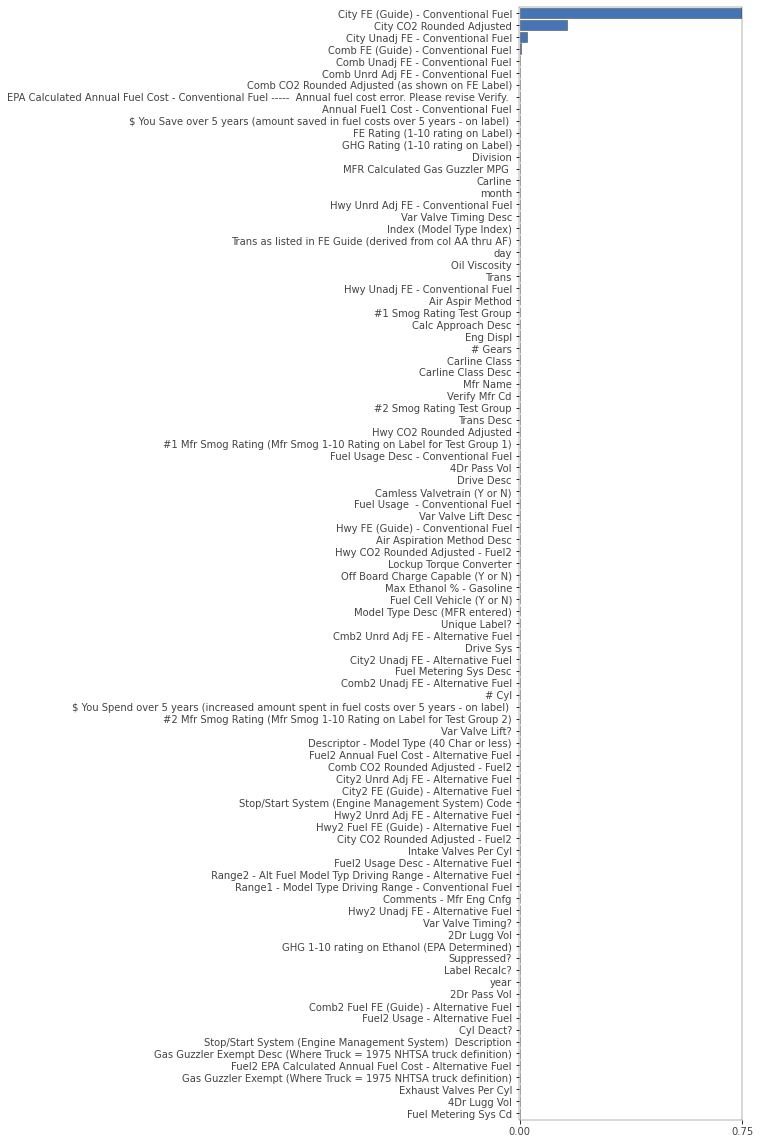

In [ ]:
showimp(rf, x, y)